# Introduction
In natural language processing, word sense disambiguation (WSD) is the problem of determining which "sense" (meaning) of a word is activated by the use of the word in a particular context, a process which appears to be largely unconscious in people. WSD is a natural classification problem: Given a word and its possible senses, as defined by a dictionary, classify an occurrence of the word in context into one or more of its sense classes. The features of the context (such as neighboring words) provide the evidence for classification.

In [79]:
!pip install nltk spacy pandas numpy scikit-learn spacy-lookups-data

In [80]:
from nltk import wsd
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
import warnings

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


In [81]:
# in the below example the word die has a different meanings in each sentence.
# only by understanding the context the of the word the NLP can further improvise.

X = 'The die is cast.'
Y = 'Roll the die to get a 6.'
Z = 'What is dead may never die.'

In [82]:
# in this we will use wordnet from princeton university to get the word different context sentences with part of speech attached.
# Wordnet : WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of
# cognitive synonyms (synsets), each expressing a distinct concept
# In python wordnet data is loaded with NLTK. in the

# in the below will pass word die to wordnet and try to get the different unqiue sentences that wordnet have for die
# output : wordnet gave many different definations of die that include Verbs and nouns

wn.synsets("die")

[Synset('die.n.01'),
 Synset('die.n.02'),
 Synset('die.n.03'),
 Synset('die.v.01'),
 Synset('die.v.02'),
 Synset('die.v.03'),
 Synset('fail.v.04'),
 Synset('die.v.05'),
 Synset('die.v.06'),
 Synset('die.v.07'),
 Synset('die.v.08'),
 Synset('die.v.09'),
 Synset('die.v.10'),
 Synset('die.v.11')]

In [83]:
# check noun related details
wn.synsets('die', pos=wn.NOUN)

[Synset('die.n.01'), Synset('die.n.02'), Synset('die.n.03')]

In [84]:
# print all the definations of nouns
i =0
for syn in wn.synsets('die', pos=wn.NOUN):
    print("defination {0} : {1}".format(i, syn.definition()))
    i+=1

defination 0 : a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers
defination 1 : a device used for shaping metal
defination 2 : a cutting tool that is fitted into a diestock and used for cutting male (external) screw threads on screws or bolts or pipes or rods


In [85]:
# print all the definations of verbs
i =0
for syn in wn.synsets('die', pos=wn.VERB):
    print("defination {0} : {1}".format(i, syn.definition()))
    i+=1

defination 0 : pass from physical life and lose all bodily attributes and functions necessary to sustain life
defination 1 : suffer or face the pain of death
defination 2 : be brought to or as if to the point of death by an intense emotion such as embarrassment, amusement, or shame
defination 3 : stop operating or functioning
defination 4 : feel indifferent towards
defination 5 : languish as with love or desire
defination 6 : cut or shape with a die
defination 7 : to be on base at the end of an inning, of a player
defination 8 : lose sparkle or bouquet
defination 9 : disappear or come to an end
defination 10 : suffer spiritual death; be damned (in the religious sense)


# Word-Sense Disambiguation with Lesk Algorithm

In [86]:
# input the sentence X i.e 'The die is cast.' and check if lesk is able to find the correct similar sentence.
print(X)
print(wsd.lesk(X.split(), 'die'))
print(wsd.lesk(X.split(), 'die').definition())

The die is cast.
Synset('die.v.07')
cut or shape with a die


For the input sentence X,lesk have found a similar matching sentence the type of that is verb, and which is not correct. In the next will explicitly pass the part of speech (POS) and check the output

In [87]:
# with passing a POS we got the correct defiantion.
print(X)
wsd.lesk(X.split(), 'die', pos=wn.NOUN).definition()

The die is cast.


'a cutting tool that is fitted into a diestock and used for cutting male (external) screw threads on screws or bolts or pipes or rods'

In [88]:
# for sentence X i.e 'Roll the die to get a 6.' is again a noun.
print(Y)
wsd.lesk(Y.split(), 'die').definition()

Roll the die to get a 6.


'to be on base at the end of an inning, of a player'

with not passing the type, wordnet again gave a wrong defination. let's try with passing the correct defination.

In [89]:
# with passing a POS we got the correct defiantion.

wsd.lesk(Y.split(), 'die', pos=wn.NOUN).definition()

'a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers'

In [90]:
# Similar observations with sentance Z
print(Z)
wsd.lesk(Z.split(), 'die').definition()

What is dead may never die.


'a cutting tool that is fitted into a diestock and used for cutting male (external) screw threads on screws or bolts or pipes or rods'

In [91]:
wsd.lesk(Z.split(), 'die', pos=wn.VERB).definition()

'stop operating or functioning'

in the next will implement automatic POS finiding and correct defination using lesk. Before that will check little about POS tagging using spicy.

### POS Tagging

In [92]:
# passing a sentance to spacy for automatic find of POS tag.
# from the output it's evident that the way POS is found for a sentence.

sent1 = "I loved the screen on this phone."
doc1 = nlp(sent1)
for tok in doc1:
    print(tok.text,tok.pos_)

I PRON
loved VERB
the DET
screen NOUN
on ADP
this DET
phone NOUN
. PUNCT


In [93]:
# another example
sent2 = "The battery life on this phone is great. !"
doc2 = nlp(sent2)
for tok in doc2:
    print(tok.text,tok.pos_)

The DET
battery NOUN
life NOUN
on ADP
this DET
phone NOUN
is AUX
great ADJ
. PUNCT
! PUNCT


In [94]:
# reading the POS tagging and lemma both (just extending an example to show the lemma)

sent1 = "I loved the screen on this phone."
doc1 = nlp(sent1)
pos = []
lemma = []
text = []
for tok in doc1:
    pos.append(tok.pos_)
    lemma.append(tok.lemma_)
    text.append(tok.text)
nlp_table = pd.DataFrame({'text':text,'lemma':lemma,'pos':pos})
nlp_table.head()

,text,lemma,pos
0,I,I,PRON
1,loved,love,VERB
2,the,the,DET
3,screen,screen,NOUN
4,on,on,ADP


### Automatic POS Tagging + Lesk with spaCy

In [95]:
POS_MAP = {
    'VERB': wn.VERB,
    'NOUN': wn.NOUN,
    'PROPN': wn.NOUN
}


def lesk(doc, word):
    found = False
    for token in doc:
        if token.text == word:
            word = token
            found = True
            break
    if not found:
        raise ValueError(f'Word \"{word}\" does not appear in the document: {doc.text}.')
    pos = POS_MAP.get(word.pos_, False)
    if not pos:
        warnings.warn(f'POS tag for {word.text} not found in wordnet. Falling back to default Lesk behaviour.')
    args = [c.text for c in doc], word.text
    kwargs = dict(pos=pos)
    return wsd.lesk(*args, **kwargs)

In [96]:
doc = nlp('Roll the die to get a 6.')
lesk(doc, 'die')

Synset('die.n.01')

In [97]:
# with finding POS tag by default, this helping lesk to find the correct defination.

lesk(doc, 'die').definition()

'a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers'

In [98]:
# check google as company.

lesk(nlp('I work at google.'), 'google').definition()

"a widely used search engine that uses text-matching techniques to find web pages that are important and relevant to a user's search"

In [99]:
# check google as a verb (search engine)

lesk(nlp('I will google it.'), 'google').definition()

'search the internet (for information) using the Google search engine'

In [100]:
# hope as a noun

lesk(nlp('Her pep talk gave me hope'), 'hope').definition()

'grounds for feeling hopeful about the future'

In [101]:
# hope as a veb

lesk(nlp('I hope we win!'), 'hope').definition()

'intend with some possibility of fulfilment'

# **with above observations it's clear that wordnet with lesk is working as expected.**

# Task 2
### MEMM Implementation for WSD


In [102]:
import nltk
from nltk.corpus import wordnet as wn
from nltk import ConditionalFreqDist, ConditionalProbDist, LidstoneProbDist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict

In [103]:
# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
# Function to extract features for MEMM
def extract_features(sentence, index):
    word = sentence[index]
    features = {
        'word': word,
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'pos_tag': nltk.pos_tag([word])[0][1],  # POS tag
    }
    return features

In [105]:
# Function to get training data with WordNet synsets as labels
def get_training_data(sentences):
    training_data = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tagged_tokens = nltk.pos_tag(tokens)
        for index, (word, tag) in enumerate(tagged_tokens):
            synsets = wn.synsets(word)
            if synsets:
                best_sense = synsets[0]  # Use the first sense for training
                features = extract_features(tokens, index)
                training_data.append((features, best_sense.name()))
    return training_data

In [106]:
from nltk.classify import MaxentClassifier

In [107]:
# MEMM Training function using MaxentClassifier
def train_memm_model(training_data):
    # Training MaxentClassifier with the feature set and labels
    return MaxentClassifier.train(training_data)

In [108]:
# MEMM Prediction function
def memm_predict(model, sentence):
    tokens = nltk.word_tokenize(sentence)
    predictions = []

In [109]:
# MEMM Prediction function
def memm_predict(model, sentence):
    tokens = nltk.word_tokenize(sentence)
    predictions = []

    for i, word in enumerate(tokens):
        features = extract_features(tokens, i)

        # Use the trained MaxentClassifier's classify method
        predicted_label = model.classify(features)
        predictions.append(predicted_label)

    return predictions


In [110]:
# Example sentences for training and testing
sentences = [
    "I bank at the river bank.",
    "The financial institution is a bank.",
    "I deposited money in the bank.",
    "The bank approved the loan.",
    "The river flows near the bank.",
]

In [111]:
# Split the data into training and testing sets
train_sentences, test_sentences = train_test_split(sentences, test_size=0.4, random_state=42)

In [112]:
# Get training data
training_data = get_training_data(train_sentences)

In [113]:
# Train MEMM model
memm_model = train_memm_model(training_data)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -2.19722        0.077
             2          -0.86348        1.000
             3          -0.55832        1.000
             4          -0.41611        1.000
             5          -0.33334        1.000
             6          -0.27899        1.000
             7          -0.24045        1.000
             8          -0.21165        1.000
             9          -0.18926        1.000
            10          -0.17134        1.000
            11          -0.15665        1.000
            12          -0.14438        1.000
            13          -0.13397        1.000
            14          -0.12502        1.000
            15          -0.11723        1.000
            16          -0.11040        1.000
            17          -0.10435        1.000
            18          -0.09895        1.000
            19          -0.09411        1.000
 

In [114]:
# Test the MEMM model and collect predictions
true_labels = []
predicted_labels = []

In [115]:
for sentence in test_sentences:
    tokens = nltk.word_tokenize(sentence)
    tagged_tokens = nltk.pos_tag(tokens)

    predicted_senses = memm_predict(memm_model, sentence)

    for i, (word, tag) in enumerate(tagged_tokens):
        synsets = wn.synsets(word)
        if synsets:
            true_labels.append(synsets[0].name())  # Using first sense as true label
            predicted_labels.append(predicted_senses[i])

In [116]:
# Accuracy of the MEMM
accuracy = nltk.classify.accuracy(memm_model, get_training_data(test_sentences))
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3333


In [117]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

In [118]:
conf_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

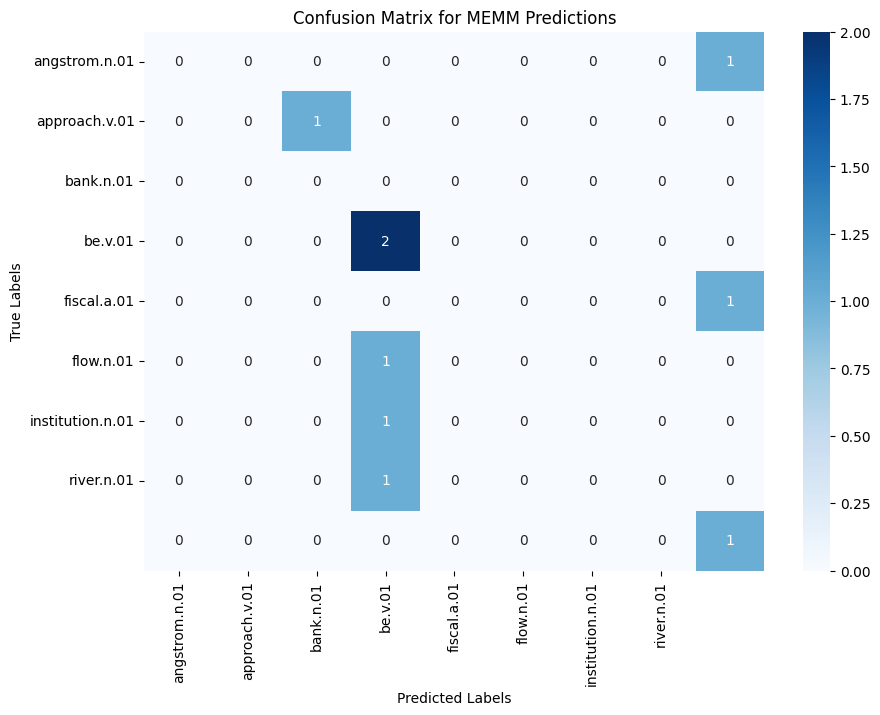

In [119]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix for MEMM Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [120]:
# Test the MEMM model
test_sentence = "The bank is by the river."
predicted_senses = memm_predict(memm_model, test_sentence)

In [121]:
# Output predictions
for word, sense in zip(nltk.word_tokenize(test_sentence), predicted_senses):
    print(f"Word: {word}, Predicted Sense: {sense}")

Word: The, Predicted Sense: iodine.n.01
Word: bank, Predicted Sense: bank.n.01
Word: is, Predicted Sense: astatine.n.01
Word: by, Predicted Sense: astatine.n.01
Word: the, Predicted Sense: river.n.01
Word: river, Predicted Sense: river.n.01
Word: ., Predicted Sense: bank.n.01


# TASK 3
### Implementation of WSD with Baseline ,decision tress and neural networks

In [122]:
import nltk
from nltk.corpus import wordnet as wn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [123]:
# Function to extract features for the models
def extract_features(sentence, index):
    word = sentence[index]
    features = {
        'word': word,
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'pos_tag': nltk.pos_tag([word])[0][1],  # POS tag
    }
    return features

In [124]:
# Function to get training data with WordNet synsets as labels
def get_training_data(sentences):
    training_data = []
    true_labels = []

    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tagged_tokens = nltk.pos_tag(tokens)
        for index, (word, tag) in enumerate(tagged_tokens):
            synsets = wn.synsets(word)
            if synsets:
                best_sense = synsets[0]  # Using the first sense as ground truth
                features = extract_features(tokens, index)
                training_data.append((features, best_sense.name()))
                true_labels.append(best_sense.name())
    return training_data, true_labels


In [125]:
# Split the data into training and testing sets
sentences = [
    "I bank at the river bank.",
    "The financial institution is a bank.",
    "I deposited money in the bank.",
    "The bank approved the loan.",
    "The river flows near the bank.",
]

train_sentences, test_sentences = train_test_split(sentences, test_size=0.4, random_state=42)

In [126]:
# Get training data
train_data, train_labels = get_training_data(train_sentences)
test_data, test_labels = get_training_data(test_sentences)


In [127]:
# Convert feature dicts to feature lists (for non-nltk classifiers)
def convert_features(data):
    feature_list = []
    label_list = []
    for (features, label) in data:
        # Convert dictionary features into a sorted tuple of values
        feature_values = tuple(features.values())
        feature_list.append(feature_values)
        label_list.append(label)
    return feature_list, label_list

train_X, train_y = convert_features(train_data)
test_X, test_y = convert_features(test_data)

### 1. Baseline WSD: Most Frequent Sense (MFS)

In [128]:
def baseline_wsd(sentence):
    tokens = nltk.word_tokenize(sentence)
    predictions = []

    for word in tokens:
        synsets = wn.synsets(word)
        if synsets:
            predictions.append(synsets[0].name())  # Always pick the most frequent sense
        else:
            predictions.append(None)  # No sense found
    return predictions

In [129]:
# Evaluate Baseline WSD
predicted_baseline = []
for sentence in test_sentences:
    predicted_baseline.extend(baseline_wsd(sentence))

In [131]:
predicted_baseline

[None,
 'fiscal.a.01',
 'institution.n.01',
 'be.v.01',
 'angstrom.n.01',
 'bank.n.01',
 None,
 None,
 'river.n.01',
 'flow.n.01',
 'approach.v.01',
 None,
 'bank.n.01',
 None]

### 2. WSD with Decision Tree Classifier


Decision Tree WSD Classification Report:
                  precision    recall  f1-score   support

   angstrom.n.01       0.00      0.00      0.00         1
   approach.v.01       0.00      0.00      0.00         1
       bank.n.01       1.00      1.00      1.00         2
         be.v.01       0.00      0.00      0.00         1
     fiscal.a.01       0.00      0.00      0.00         1
       flow.n.01       0.00      0.00      0.00         1
institution.n.01       0.00      0.00      0.00         1
     iodine.n.01       0.00      0.00      0.00         0
      river.n.01       1.00      1.00      1.00         1

        accuracy                           0.33         9
       macro avg       0.22      0.22      0.22         9
    weighted avg       0.33      0.33      0.33         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

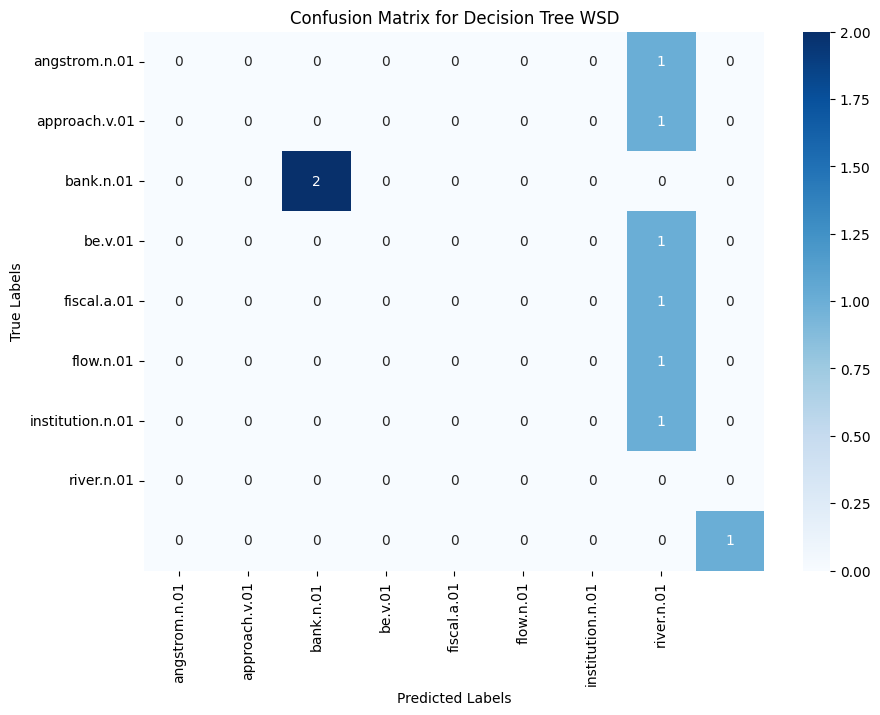

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming train_X is a list of tuples and you want the first element (the sentence)
train_X_text = [text[0] for text in train_X]  # Extracting the text from tuples
test_X_text = [text[0] for text in test_X]    # Similarly for test_X

# Use TfidfVectorizer to convert text into numerical vectors
vectorizer = TfidfVectorizer()

# Fit and transform the training data
train_X_vectorized = vectorizer.fit_transform(train_X_text)

# Transform the test data
test_X_vectorized = vectorizer.transform(test_X_text)

# Now fit the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_X_vectorized, train_y)

# Make predictions
predicted_dt = dt_classifier.predict(test_X_vectorized)

# Evaluate the model
print("\nDecision Tree WSD Classification Report:")
print(classification_report(test_y, predicted_dt))

# Confusion Matrix for Decision Tree WSD
conf_matrix_dt = confusion_matrix(test_y, predicted_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
plt.title('Confusion Matrix for Decision Tree WSD')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 3. WSD with Neural Network (MLP Classifier)

In [142]:
# Assuming train_X is a list of tuples and you want the first element (the sentence)
train_X_text = [text[0] for text in train_X]  # Extracting the text from tuples
test_X_text = [text[0] for text in test_X]    # Similarly for test_X

# Use TfidfVectorizer to convert text into numerical vectors
vectorizer = TfidfVectorizer()

# Fit and transform the training data
train_X_vectorized = vectorizer.fit_transform(train_X_text)

# Transform the test data
test_X_vectorized = vectorizer.transform(test_X_text)


nn_classifier = MLPClassifier(random_state=42, max_iter=1000)
nn_classifier.fit(train_X_vectorized, train_y)




MLPClassifier(max_iter=1000, random_state=42)

In [143]:
# Predict using Neural Network WSD
predicted_nn = nn_classifier.predict(test_X_vectorized)


Neural Network WSD Classification Report:
                  precision    recall  f1-score   support

   angstrom.n.01       0.00      0.00      0.00         1
   approach.v.01       0.00      0.00      0.00         1
       bank.n.01       1.00      1.00      1.00         2
         be.v.01       0.00      0.00      0.00         1
     fiscal.a.01       0.00      0.00      0.00         1
       flow.n.01       0.00      0.00      0.00         1
institution.n.01       0.00      0.00      0.00         1
     iodine.n.01       0.00      0.00      0.00         0
      river.n.01       1.00      1.00      1.00         1

        accuracy                           0.33         9
       macro avg       0.22      0.22      0.22         9
    weighted avg       0.33      0.33      0.33         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

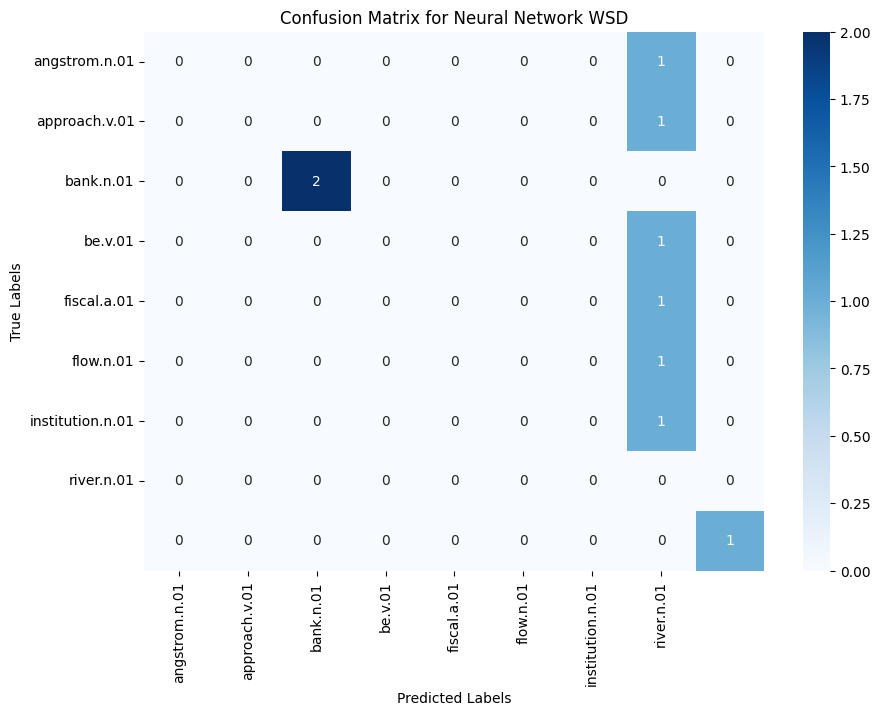

In [144]:
print("\nNeural Network WSD Classification Report:")
print(classification_report(test_y, predicted_nn))

# Confusion Matrix for Neural Network WSD
conf_matrix_nn = confusion_matrix(test_y, predicted_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
plt.title('Confusion Matrix for Neural Network WSD')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()